In [1]:
import os
os.chdir('/Users/yugu/Downloads/all')

In [18]:
import  numpy as np
import  pandas  as  pd 
import  matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

# Read in files
aisles = pd.read_csv('aisles.csv')
departments =  pd.read_csv('departments.csv')
order_products_prior =  pd.read_csv('order_products__prior.csv')
order_products_train =  pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')

In [19]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [20]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [21]:

# Filter for only Prior data in the orders
orders_prior = orders.loc[orders['eval_set'] == 'prior']

In [24]:
cnt_srs = orders_prior.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

cnt_srs.head()

3    23986
4    19590
5    16165
6    13850
7    11700
Name: order_number, dtype: int64

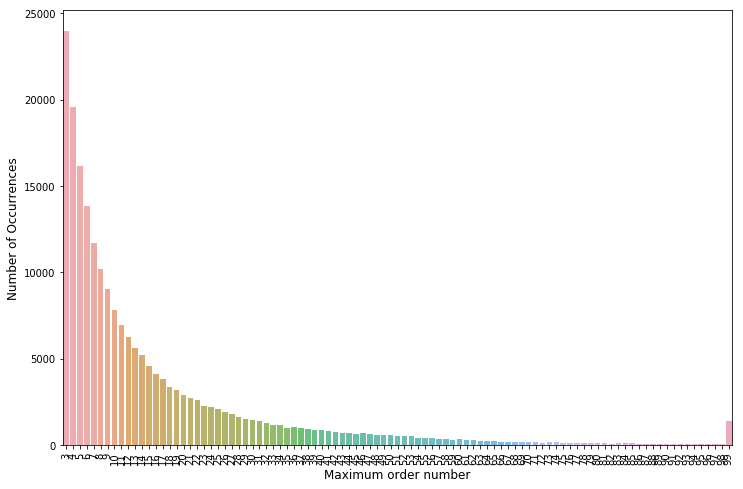

In [25]:
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)

plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

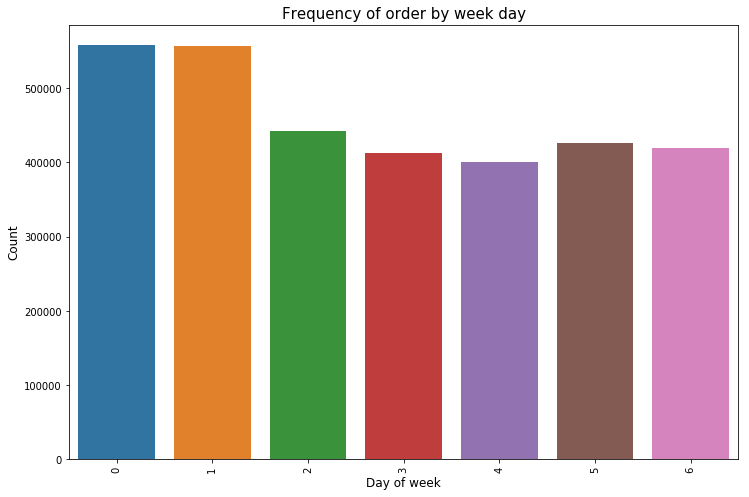

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_prior)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

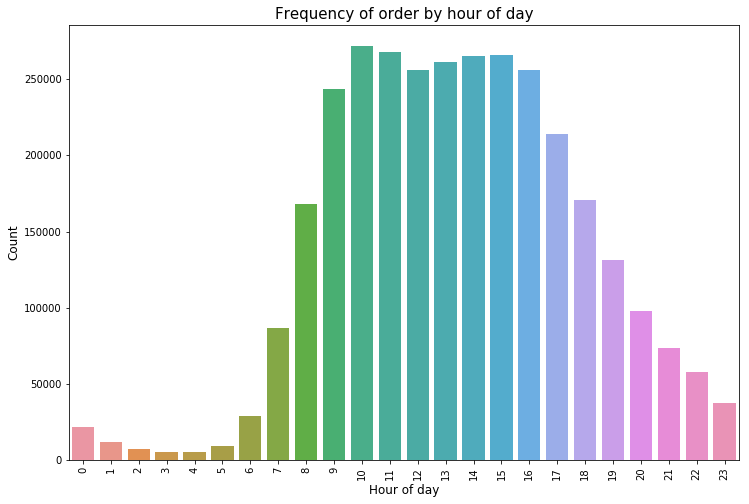

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_prior)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

Text(0,0.5,'No. Orders')

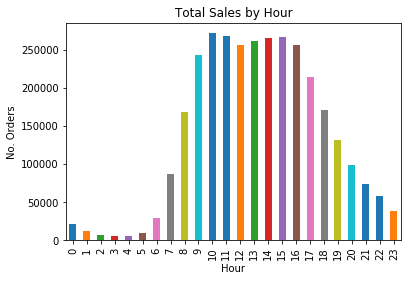

In [9]:
# Plot the hours people most likley order
orders_hour = orders_prior.groupby(['order_hour_of_day']).size()
orders_by_hour = orders_hour.plot(kind='bar',title="Total Sales by Hour")
orders_by_hour.set_xlabel("Hour")
orders_by_hour.set_ylabel("No. Orders")

In [30]:

grouped_df = orders_prior.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')


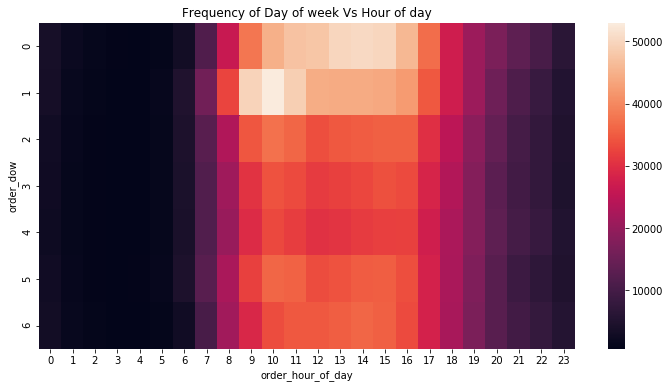

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Text(0,0.5,'No. Orders')

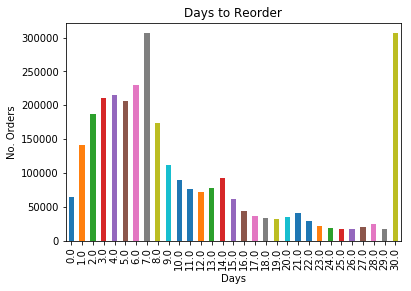

In [10]:

# Plot time to reorder# Plot  
orders_reorder = orders_prior.groupby(['days_since_prior_order']).size()
orders_by_reorder = orders_reorder.plot(kind='bar',title="Days to Reorder")
orders_by_reorder.set_xlabel("Days")
orders_by_reorder.set_ylabel("No. Orders")

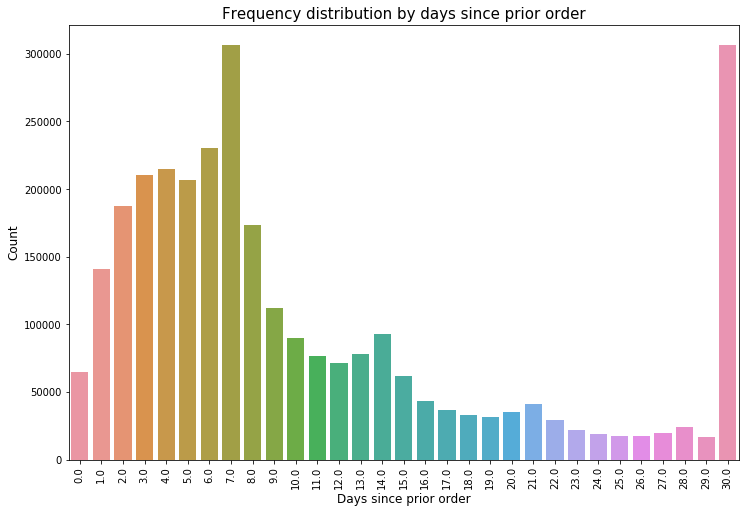

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_prior)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [37]:
orders_prior['reordered'] = np.where(orders_prior['days_since_prior_order'].isnull(), 0, 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
orders_prior.reordered.sum() / orders_prior.shape[0]

0.9358578283316857

In [39]:
grouped_df = orders_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


1    0.935858
0    0.064142
Name: reordered, dtype: float64

In [ ]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

In [11]:
# Get the distibution number of products that are ordered
products_order = order_products_prior.groupby(["order_id"]).size()
products_by_order = sns.violinplot(x=products_order,scale="width")
print products_order.mean()

SyntaxError: invalid syntax (<ipython-input-11-bb0e1a070de2>, line 4)

In [12]:
# Merge orders and products 
orders_prior_by_products = order_products_prior.merge(orders_prior)[['order_id','product_id','reordered']]
orders_grouped_product = orders_prior_by_products.groupby(["product_id"])["reordered"].aggregate({'Re-orders': 'count'}).reset_index()
orders_grouped_products = orders_grouped_product.merge(products).sort_values(by=['Re-orders'], ascending=False)
orders_grouped_products.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,product_id,Re-orders,product_name,aisle_id,department_id
24848,24852,472565,Banana,24,4
13172,13176,379450,Bag of Organic Bananas,24,4
21133,21137,264683,Organic Strawberries,24,4
21899,21903,241921,Organic Baby Spinach,123,4
47198,47209,213584,Organic Hass Avocado,24,4
47755,47766,176815,Organic Avocado,24,4
47615,47626,152657,Large Lemon,24,4
16793,16797,142951,Strawberries,24,4
26204,26209,140627,Limes,24,4
27839,27845,137905,Organic Whole Milk,84,16


In [13]:

# Merge products and deparments# Merge  
orders_prior_by_department = orders_prior_by_products.merge(products)
orders_grouped_deparment = orders_prior_by_department.groupby(["department_id"])["reordered"].aggregate({'Re-orders': 'count'}).reset_index()
orders_grouped_deparments = orders_grouped_deparment.merge(departments).sort_values(by=['Re-orders'], ascending=False)
orders_grouped_deparments.head(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


,department_id,Re-orders,department
3,4,9479291,produce
15,16,5414016,dairy eggs
18,19,2887550,snacks
6,7,2690129,beverages
0,1,2236432,frozen
12,13,1875577,pantry
2,3,1176787,bakery
14,15,1068058,canned goods
19,20,1051249,deli
8,9,866627,dry goods pasta
